# Optimal Cluster Selection

## Introduction: Elbow Plot

One of the problems in unsupervised clustering is choosing the number of clusters that we are looking for. Specifically when we are using k-means, we need to specify our value of k. One of the most popular methods to choose k is the elbow method. In this approach, we track a quantity called __inertia__. The whole idea of k-means is to minimize this value that we call inertia which is also referred to as __within-cluster sum of squares criterion__. Check out the [clustering page](https://scikit-learn.org/stable/modules/clustering.html) at sklearn to learn more. 

$$ \sum\limits_{i=0}^n \min\limits_{\mu_j \in C}(||x_i-\mu_j||^2)$$


As we increase our value of k, invariably our inertia goes down. We then look for a value of k where there is a large drop in inertia going from k-1 to k, then a relatively small drop in inertia going from k to k+1. This just indicates that our value of k was really good for decreasing inertia and increasing past this point would be not as useful.

Let's try to see how well this method to "guess" the proper amount of clusters are needed:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import pairwise_distances

In [2]:
X_1, y_1 = make_blobs(n_samples=10000, centers=[[0,0]], n_features=2,random_state=0)

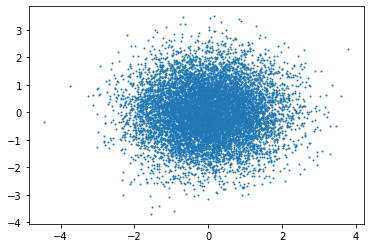

In [3]:
plt.scatter(X_1[:,0],X_1[:,1],s=1)

With the code snippet above, we see that we can create gaussian blobs of points in 2D. We are going to consider these as clusters and we are going to create a dataset where we have two blobs that are somewhat separated from each other.

In [4]:
distance=4
X_2, y_2 = make_blobs(n_samples=3000, centers=[[0,0],[0,distance]], n_features=2,random_state=0)

Text(0, 0.5, 'Y Axis')

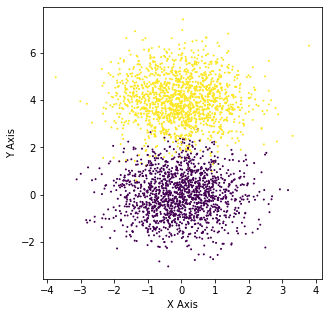

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(X_2[:,0],X_2[:,1],c=y_2,s=1)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

Here we can clearly see that there are two different clusters present. Now if we are to train a bunch of k-means classifiers on this dataset and look at the overall elbow diagram, we should expect to see that the optimal value for k would be 2.

In [6]:
def training_classifiers(max_number_clusters,train_data):
    """
    This function returns a list of k-means classifiers trained on the input train data where k is set to [1,...,max_number_clusters]
    
    Parameters
    ----------
    max_number_clusters: int 
    train_data: np.array(), shape of array (sampling dimension, data dimension)
    
    Returns
    -------
    [kMeans()], kMeans classifiers in an array
    """

    k_means_algos_down = []

    ks = list(range(1,max_number_clusters+1))
    for k in ks:
#         print(k)
        kmeans = KMeans(init='k-means++',n_clusters = k,n_init=10,verbose=3,n_jobs=-1)
        kmeans.fit(train_data)
        k_means_algos_down.append(kmeans)
    return k_means_algos_down

In [7]:
b = training_classifiers(5,X_2)

In [8]:
inertias = [algo.inertia_ for algo in b]

Text(0.5, 1.0, 'Elbow Diagram')

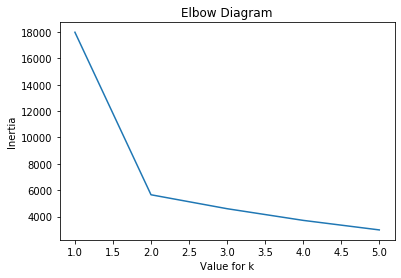

In [9]:
plt.plot(list(range(1,6)),inertias)
plt.xlabel("Value for k")
plt.ylabel("Inertia")
plt.title("Elbow Diagram")

Above we can clearly see that there is a "kink" at the value of 2 so according the Elbow Diagram the optimal value for k is 2.

__What would be an interesting study would be varying the distance between our two blobs in order to see when exactly does this kink form and how does it form.__

In [10]:
distance_between_blobs = np.linspace(0,3,10) # Let's set a series of varying distances

In [11]:
elbows = []
for distance in distance_between_blobs:
    X_temp, y = make_blobs(n_samples=3000, centers=[[0,0],[0,distance]], n_features=2,random_state=0)
    a = training_classifiers(5,X_temp)
    inertias = [algo.inertia_ for algo in a]
    elbows.append(inertias)

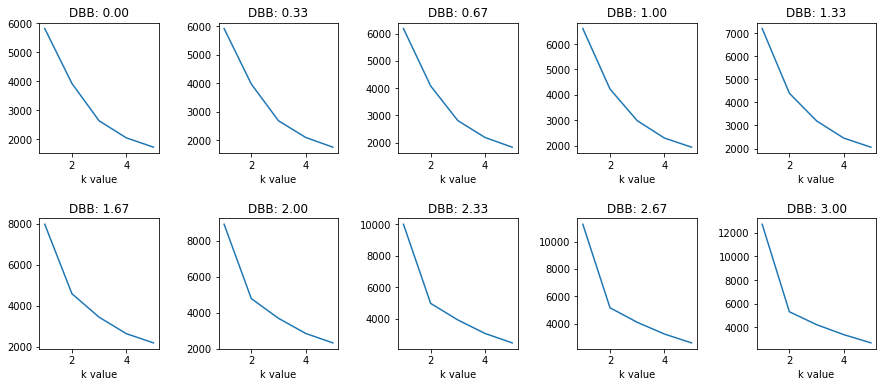

In [12]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

for i in range(10):
    axs[i].plot(list(range(1,6)),elbows[i])
    axs[i].set_title("DBB: %.2f" % (distance_between_blobs[i]))
    axs[i].set_xlabel("k value")

We see that around 1.67 DBB (Distance Between Blobs) we begin to really see the kink form. The distribution at his point looks like the following:

Text(0, 0.5, 'Y Axis')

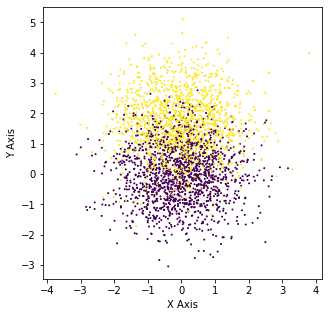

In [13]:
distance = 1.67
X_3, y_3 = make_blobs(n_samples=3000, centers=[[0,0],[0,distance]], n_features=2,random_state=0)

plt.figure(figsize=(5,5))
plt.scatter(X_3[:,0],X_3[:,1],c=y_3,s=1)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

Crazy right because at this point it is pretty hard to tell with the human eye.

## Gap Statistic

Now we are going to consider a different way to tell how many clusters there are and that is the __Gap Statistic__ [Paper Reference](https://statweb.stanford.edu/~gwalther/gap).

_Some inspiration:_
- https://datasciencelab.wordpress.com/tag/gap-statistic/
- https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/
- https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

The Gap Statistic is defined in the following way:

$$W_k = \sum\limits^k_{r=1}\frac{1}{n_r}D_r$$

We first need to define the pooled within-cluster sum of squares around the cluster means

## Arbitrary Data Creation

In [14]:
# import seaborn as sns; sns.set()

##Visualization with Seaborn if required
# X1_dataframe = pd.DataFrame(X[y==0],columns=["x","y"])
# X2_dataframe = pd.DataFrame(X[y==1],columns=["x","y"])
# X3_dataframe = pd.DataFrame(X[y==2],columns=["x","y"])

# fig, ax = plt.subplots()
# ax.axis('equal')
# ax = sns.kdeplot(X1_dataframe.x,X1_dataframe.y, cmap="Reds", shade=True, shade_lowest=False, ax=ax)
# ax = sns.kdeplot(X2_dataframe.x,X2_dataframe.y, cmap="Blues", shade=True, shade_lowest=False, ax=ax)
# ax = sns.kdeplot(X3_dataframe.x,X3_dataframe.y, cmap="Greens", shade=True, shade_lowest=False, ax=ax)

In [15]:
X_4, y_4 = make_blobs(n_samples=10000, centers=[[0,0],[0,2],[3,0]], n_features=2,random_state=0)

Text(0, 0.5, 'Y Axis')

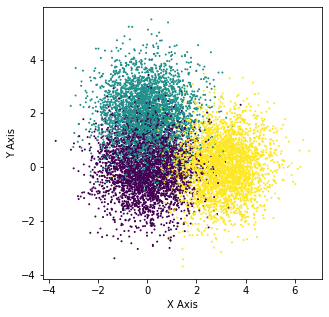

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(X_4[:,0],X_4[:,1],c=y_4,s=1)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

## Designing $W_k$

$$W_k = \sum\limits^k_{r=1}\frac{1}{n_r}D_r$$

Our first quantity is referred to as the pooled within-cluster sum of squares which is really just the sum of all the pairwise distances within a cluster divided by the size of the cluster.

In [17]:
def W_k(clusters):
    """
    Calculates W_k according to the formula above
    
    Parameters
    ----------
    clusters: np.array(), shape of array (index of cluster, cluster_data)
    
    Returns
    -------
    W_k: float
    """
    total=0
    for i in range(len(clusters)):
        D = pairwise_distances(clusters[i])
        total += np.sum(D)/(2*len(clusters[i]))
    return total

In [18]:
# Training the models
k_means_algos_down = []

ks = list(range(1,7))
for k in ks:
    print(k)
    kmeans = KMeans(init='k-means++',n_clusters = k,n_init=10,verbose=3,n_jobs=-1,random_state=0)
    kmeans.fit(X_4)
    k_means_algos_down.append(kmeans)

1
2
3
4
5
6


In [19]:
k=3
means = k_means_algos_down[2].cluster_centers_
clusters = np.array([X_4[k_means_algos_down[2].labels_==i] for i in range(k)])

In [20]:
W_ks = []
for j in range(6):
    clusters = np.array([X_4[k_means_algos_down[j].labels_==i] for i in range(j+1)])
    W_ks.append(W_k(clusters))

Text(0, 0.5, 'Internal Sum of Squares')

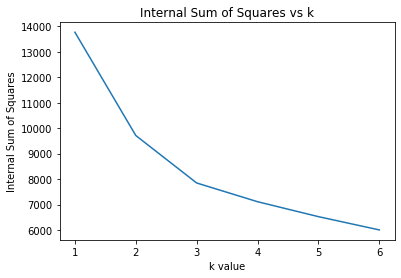

In [21]:
plt.figure();plt.title("Internal Sum of Squares vs k")
plt.plot(list(range(1,7)),W_ks)
plt.xlabel("k value")
plt.ylabel("Internal Sum of Squares")

We can visualize this in a similar way to the elbow plot to observe a similar drop off with increasing k. As with inertia, we see that the Internal Sum of Squares decreases monotonically with increasing k.

## Generating a Uniform Sample

The second step of the process of calculating the Gap Statistic is having a baseline or a uniformly random sample to compare the Internal Sum of Square with. Therefore we attempt to generate a uniform distribution over the "bounding dimensions" (maximum and minimum values over each dimension).

In [22]:
def bounding_dimensions(X):
    """
    Parameters
    ----------
    X: np.array(), training data of arbitrary shape
    
    Returns
    -------
    dimension_ranges: np.array(), array where each dimension contains the max and min values for that dimension from X
    """
    
    dimension_ranges = []
    for i in range(X.shape[1]):
        dimension_ranges.append([min(X[:,i]),max(X[:,i])])
    return np.array(dimension_ranges)

def generating_uniform_over_variables(ranges,size=1000):
    """
    Parameters
    ----------
    ranges: np.array(), max and min values for each dimension considered
    size: int, random values sampled
    
    Returns
    -------
    output: np.array(), uniformly sampled data from the max and min values for each dimension
    """
    
    return np.array([np.random.uniform(low=r[0],high=r[1],size=size) for r in ranges]).T

With these functions we can calculating the bounding dimensions and a uniform sample over the bounding dimensions from our original data X.

In [23]:
dimensions = bounding_dimensions(X_4)

In [24]:
uniform_sample = generating_uniform_over_variables(dimensions,size=10000)

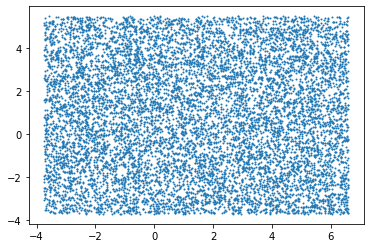

In [25]:
plt.scatter(uniform_sample[:,0],uniform_sample[:,1],s=1)

In [26]:
# Training the models
uniform_k_means_algos_down = []

ks = list(range(1,7))
for k in ks:
    print(k)
    kmeans = KMeans(init='k-means++',n_clusters = k,n_init=10,verbose=3,n_jobs=-1)
    kmeans.fit(uniform_sample)
    uniform_k_means_algos_down.append(kmeans)

1
2
3
4
5
6


In [27]:
W_ks_star = []
for j in range(6):
    clusters = np.array([uniform_sample[uniform_k_means_algos_down[j].labels_==i] for i in range(j+1)])
    W_ks_star.append(W_k(clusters))

Text(0, 0.5, 'Internal Sum of Squares')

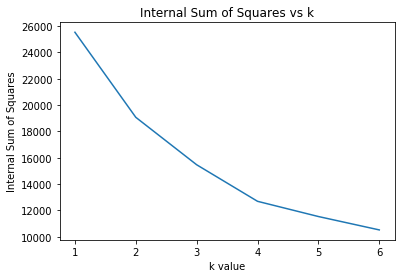

In [28]:
plt.figure();plt.title("Internal Sum of Squares vs k")
plt.plot(list(range(1,7)),W_ks_star)
plt.xlabel("k value")
plt.ylabel("Internal Sum of Squares")

## Overall Procedure for the Gap Statistic

Now the overall procedure of calculating the gap statistic is the following:

- Cluster the observed data, varying the total number of clusters from $k=1,2,\dots,K$ giving within-dispersion measures $W_k$,$k=1,2,\dots,K$.
- Generate B reference sets, using the uniform prescription (a) or (b) above, and cluster each one giving within-dispersion measures $W^*_{kb}$, $b=1,2,\dots,B$, $k=1,2,\dots,K$ then we compute the estimated gap statistic $\text{Gap}(k)=(1/B)\sum\limits_{b}\log(W^{*}_{kb})-\log(W_k)$
- Then we are going to have to have to have $\bar{l} = (1/B)\sum_{b}\log(W^*_{kb})$, computing the standard deviation gives us:
$$sd_k = [(1/B)\sum_b[\log(W^*_{kb})-\bar{l}]^2]^{1/2}$$
then we need to define $s_k = sd_k \sqrt{1+1/B}$. Then we choose the number of clusters via:
$$\hat{k} = \text{smallest k such that Gap(k)}\geq \text{Gap(k+1)}-s_{k+1}$$

The final step is really needed to establish when the distance between two values is great enough to consider it a drop

Therefore with the previous two steps, we can compute the Gap Statistic of the data X

Text(0.5, 0, 'k value')

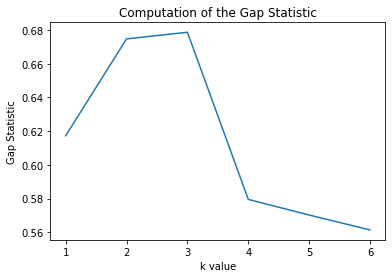

In [29]:
plt.figure();plt.title("Computation of the Gap Statistic")
plt.plot(list(range(1,7)),np.log(W_ks_star)-np.log(W_ks))
plt.ylabel("Gap Statistic")
plt.xlabel("k value")

And we see that we reach a value of k=3 as our peak (without considering the standard deviation calculation) and therefore k=3 is optimal in this case.

In [30]:
def creating_classifiers(max_number_clusters,train_data,random_state=0):
    k_means_algos = []
    ks = list(range(1,max_number_clusters+1))
    for k in ks:
        print(k)
        kmeans = KMeans(init='k-means++',n_clusters = k,n_init=10,verbose=3,n_jobs=-1,random_state=random_state)
        kmeans.fit(train_data)
        k_means_algos.append(kmeans)
    return k_means_algos

def W_k(clusters):
    total=0
    for i in range(len(clusters)):
        D = pairwise_distances(clusters[i])
        total += np.sum(D)/(2*len(clusters[i]))
    return total

def calculation_of_W_ks(max_number_clusters,X):
    output = []
    classifiers = creating_classifiers(max_number_clusters,X)
    for i in range(max_number_clusters-1):
        clusters = np.array([X[classifiers[i].labels_==j] for j in range(i+1)])
        output.append(W_k(clusters))
                      
    return np.array(output)
                      
def bounding_dimensions(X):
    dimension_ranges = []
    for i in range(X.shape[1]):
        dimension_ranges.append([min(X[:,i]),max(X[:,i])])
    return np.array(dimension_ranges)

def generating_uniform_over_variables(ranges,size=1000):
    return np.array([np.random.uniform(low=r[0],high=r[1],size=size) for r in ranges]).T

#####################################################################################################################
#              We introduce this collection of functions to aid in the calculation of the Gap Statistic             #
#####################################################################################################################

def calculation_of_W_ks_star(max_number_clusters,X,random_state=0):
    """
    Parameters
    ----------
    max_number_clusters: int
    X: np.array(), shape of array (sampling dimension, data dimension)
    random_state: int, used to fix the output
    
    Returns
    -------
    output: np.array(), W_ks calculated as described for the Gap Statistic
    
    """
    output = []
    dimension_ranges = bounding_dimensions(X)
    uniform_sample = generating_uniform_over_variables(dimension_ranges,size=len(X))
    
    classifiers = creating_classifiers(max_number_clusters,uniform_sample,random_state=random_state)
    
    for i in range(max_number_clusters-1):
        clusters = np.array([uniform_sample[classifiers[i].labels_==j] for j in range(i+1)])
        output.append(W_k(clusters))
                      
    return np.array(output)

def calculation_of_log_W_ks_star_B(max_number_clusters,X,B):
    """
    Parameters
    ----------
    max_number_clusters: int
    X: np.array(), shape of array (sampling dimension, data dimension)
    B: int, number of simulations for the reference data sets (the more used the lower the standard deviation)
    
    Returns
    -------
    output: np.array(), W_ks_star_B calculated as described for the Gap Statistic
    """
    B_simulations = np.array([np.log(calculation_of_W_ks_star(max_number_clusters,X,random_state=i)) for i in range(B)])
    B_means = np.mean(B_simulations,axis=0)
    
    return B_means

def calculation_of_log_W_ks(max_number_clusters,X):
    """
    Parameters
    ----------
    max_number_clusters: int
    X: np.array(), shape of array (sampling dimension, data dimension)
    
    Returns
    -------
    output: np.array(), log_W_ks calculated as described for the Gap Statistic
    
    """
    return np.log(calculation_of_W_ks(max_number_clusters,X))

def calculation_of_log_W_ks_star_B_A(max_number_clusters,X,B):
    """
    Parameters
    ----------
    max_number_clusters: int
    X: np.array(), shape of array (sampling dimension, data dimension)
    B: int, number of simulations for the reference data sets (the more used the lower the standard deviation)
    
    Returns
    -------
    output: (np.array(),np.array()), mean of log_W_ks_star_B calculated as described for the Gap Statistic, then the standard deviation of log from its average
    """
    B_simulations = np.array([np.log(calculation_of_W_ks_star(max_number_clusters,X,random_state=i)) for i in range(B)])
    B_means = np.mean(B_simulations,axis=0)
    
    #Calculating Standard Deviation
    sd_k = np.power(np.mean([np.power((B_simulations[i]-B_means),2) for i in range(B)],axis=0),0.5)
    s_k = sd_k*np.power(1+1/B,0.5)
    
    return B_means,s_k

### To test our general functions we consider the following series of tests over X

In [31]:
calc = calculation_of_W_ks(7,X_4)
calc_star = calculation_of_W_ks_star(7,X_4,random_state=0)

1
2
3
4
5
6
7
1
2
3
4
5
6
7


Text(0.5, 0, 'k value')

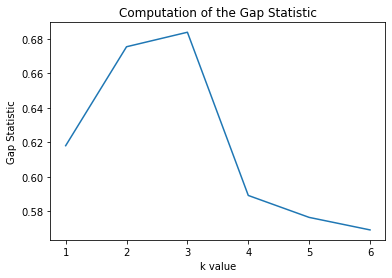

In [32]:
plt.figure();plt.title("Computation of the Gap Statistic")
plt.plot(list(range(1,7)),np.log(calc_star)-np.log(calc))
plt.ylabel("Gap Statistic")
plt.xlabel("k value")

We see that the shape is roughly the same!

_In my opinion, the Gap Statistic is really a method that compares a given datasets ability to be clustered versus a uniform example of the data with the same range. When we see that it is very clusterable, then suddenly not very clusterable, then we choose that previous value of k as the optimal value._

## Testing Validity

Let's see how this metric performs under a variety of different datasets!

### Three Obvious Blobs

In [33]:
X_5, y_5 = make_blobs(n_samples=10000, centers=[[0,0],[0,3],[3,0]], n_features=2,random_state=0)

Text(0, 0.5, 'Y Axis')

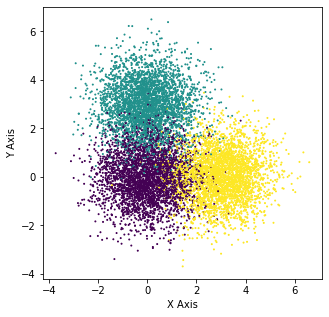

In [34]:
plt.figure(figsize=(5,5))
plt.scatter(X_5[:,0],X_5[:,1],c=y_5,s=1)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

In [35]:
calc = calculation_of_log_W_ks(7,X_5)

1
2
3
4
5
6
7


In [36]:
calc_star, s_k = calculation_of_log_W_ks_star_B_A(7,X_5,5)

1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7


Text(0.5, 0, '# of Clusters')

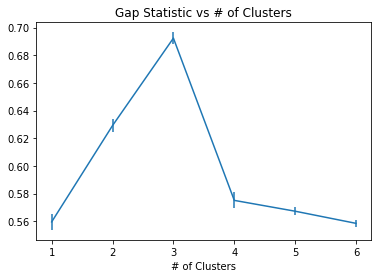

In [37]:
plt.errorbar(range(1,7),calc_star-calc,yerr=s_k)
plt.title("Gap Statistic vs # of Clusters")
plt.xlabel("Gap Statistic")
plt.xlabel("# of Clusters")

We see that for this example, the gap statistic indicates that it is very clearly 3 clusters in this dataset.

### Three Less Obvious Blobs

Text(0, 0.5, 'Y Axis')

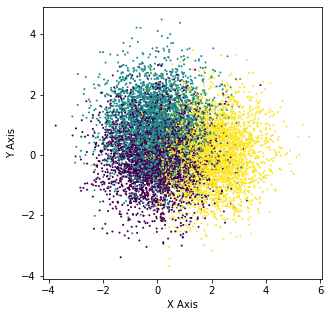

In [42]:
X_6, y_6 = make_blobs(n_samples=10000, centers=[[0,0],[0,1],[2,0]], n_features=2,random_state=0)

plt.figure(figsize=(5,5))
plt.scatter(X_6[:,0],X_6[:,1],c=y_6,s=1)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

In [43]:
calc = calculation_of_log_W_ks(7,X_6)

1
2
3
4
5
6
7


In [44]:
calc_star, s_k = calculation_of_log_W_ks_star_B_A(7,X_6,5)

1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7


Text(0.5, 0, '# of Clusters')

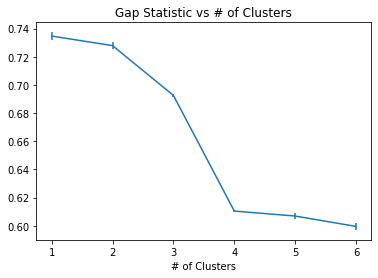

In [45]:
plt.errorbar(range(1,7),calc_star-calc,yerr=s_k)
plt.title("Gap Statistic vs # of Clusters")
plt.xlabel("Gap Statistic")
plt.xlabel("# of Clusters")

We see that for this example, the gap statistic is more ambigious in determining the optimal number of clusters in this dataset since the dataset isn't as clearly separated into three groups.

# Summary

Here we were able to discuss methods to select the optimal number of clusters for unsupervised clustering with k-Means. We covered:
- Elbow Method
- Gap Statistic

Other methods that are not covered include:
- Gaussian Mixture Model (AIC and BIC)
- Silhoutte Method
- Calinski Criterion

These techniques are usually employed in data exploration when trying to understand the structure of the data that is being delt with! I used this for a project for unsupervised clustering where the whole idea was to understand the data and these techinques were really insightful!